# Mô tả các Nhóm Đặc Trưng Luồng Mạng (Network Flow Features)

## Nhóm 1: Thông tin cơ bản về luồng mạng (Network Flow Information)
- **id.orig_p**: Cổng nguồn (source port) của luồng mạng.  
- **id.resp_p**: Cổng đích (destination port) của luồng mạng.  
- **proto**: Giao thức mạng được sử dụng (ví dụ: TCP, UDP).  
- **service**: Dịch vụ liên quan đến luồng mạng (ví dụ: MQTT, HTTP, hoặc "-").  
- **flow_duration**: Thời gian tồn tại của luồng mạng (tính bằng giây).  

## Nhóm 2: Thống kê gói tin (Packet Statistics)
- **fwd_pkts_tot**: Tổng số gói tin từ nguồn đến đích (forward).  
- **bwd_pkts_tot**: Tổng số gói tin từ đích đến nguồn (backward).  
- **fwd_data_pkts_tot**: Gói tin chứa dữ liệu từ nguồn đến đích.  
- **bwd_data_pkts_tot**: Gói tin chứa dữ liệu từ đích đến nguồn.  
- **fwd_pkts_per_sec**: Tốc độ forward packets mỗi giây.  
- **bwd_pkts_per_sec**: Tốc độ backward packets mỗi giây.  
- **flow_pkts_per_sec**: Tổng tốc độ gói tin mỗi giây.  
- **down_up_ratio**: Tỷ lệ giữa gói tin backward và forward.  

## Nhóm 3: Kích thước tiêu đề gói tin (Header Size Statistics)
- **fwd_header_size_tot**, **min**, **max**: Tổng, nhỏ nhất, lớn nhất kích thước tiêu đề gói forward.  
- **bwd_header_size_tot**, **min**, **max**: Tổng, nhỏ nhất, lớn nhất kích thước tiêu đề gói backward.  

## Nhóm 4: Cờ TCP (TCP Flags)
- **flow_FIN_flag_count**, **SYN**, **RST**, **ACK**, **CWR**, **ECE**: Số lần xuất hiện các cờ FIN, SYN, RST, ACK, CWR, ECE trong toàn bộ luồng.  
- **fwd_PSH_flag_count**, **fwd_URG_flag_count**: Số lần xuất hiện cờ PSH, URG trong forward packets.  
- **bwd_PSH_flag_count**, **bwd_URG_flag_count**: Số lần xuất hiện cờ PSH, URG trong backward packets.  

## Nhóm 5: Thống kê tải trọng gói tin (Payload Statistics)
- **fwd_pkts_payload** (min, max, tot, avg, std): Kích thước tải trọng gói tin forward.  
- **bwd_pkts_payload** (min, max, tot, avg, std): Kích thước tải trọng gói tin backward.  
- **flow_pkts_payload** (min, max, tot, avg, std): Kích thước tải trọng toàn bộ luồng.  

## Nhóm 6: Thống kê thời gian giữa các gói tin (Inter-Arrival Time Statistics)
- **fwd_iat** (min, max, tot, avg, std): Thống kê thời gian giữa các gói tin forward.  
- **bwd_iat** (min, max, tot, avg, std): Thống kê thời gian giữa các gói tin backward.  
- **flow_iat** (min, max, tot, avg, std): Thống kê thời gian giữa các gói tin bất kỳ.  

## Nhóm 7: Thống kê luồng phụ (Subflow Statistics)
- **fwd_subflow_pkts**, **bwd_subflow_pkts**: Số gói tin trung bình mỗi subflow forward/backward.  
- **fwd_subflow_bytes**, **bwd_subflow_bytes**: Số byte trung bình mỗi subflow forward/backward.  

## Nhóm 8: Thống kê khối dữ liệu (Bulk Statistics)
- **fwd_bulk_bytes**, **fwd_bulk_packets**, **fwd_bulk_rate**: Tổng byte, gói tin, tốc độ khối dữ liệu forward.  
- **bwd_bulk_bytes**, **bwd_bulk_packets**, **bwd_bulk_rate**: Tổng byte, gói tin, tốc độ khối dữ liệu backward.  

## Nhóm 9: Thống kê thời gian hoạt động và nhàn rỗi (Active/Idle Statistics)
- **active** (min, max, tot, avg, std): Thời gian hoạt động của luồng.  
- **idle** (min, max, tot, avg, std): Thời gian nhàn rỗi của luồng.  

## Nhóm 10: Kích thước cửa sổ TCP (TCP Window Size)
- **fwd_init_window_size**, **bwd_init_window_size**: Kích thước cửa sổ ban đầu của gói forward/backward.  
- **fwd_last_window_size**: Kích thước cửa sổ cuối cùng của gói forward.  

## Nhóm 11: Nhãn tấn công (Attack Label)
- **Attack_type**: Loại tấn công mạng hoặc hành vi của luồng (ví dụ: `MQTT_Publish`, `DOS_SYN_Hping`).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import Preprocessing
import DataProcessing
import model
import utils
data = Preprocessing.load_data('data/rt_iot2022', target_col='Attack_type')

In [ ]:
print(data['Attack_type'])
X = data.drop('Attack_type', axis=1)
y = data['Attack_type'] 

In [ ]:
Preprocessing.check_types(data,"object")

In [ ]:
data = Preprocessing.delete_columns(data, ['service'])
data = Preprocessing.one_hot_encode(data, ['proto'])
data = Preprocessing.label_encode(data, ['Attack_type'])
print(data.head(5))

In [ ]:
X, y = data.drop('Attack_type', axis=1), data['Attack_type']
X_balanced, y_balanced = Preprocessing.apply_smote(X, y)
X, X_test, y, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
list = DataProcessing.select_feature(X_train, y_train)

In [ ]:
Preprocessing.plot_heatmap(X_train[list['Feature']], y_train,'Attack_type')

In [ ]:
df_reduced, dropped_columns = DataProcessing.remove_highly_correlated_columns(X_train[list['Feature']], threshold=0.8)

In [ ]:
Preprocessing.plot_heatmap(X_train[list['Feature']].drop(dropped_columns, axis=1), y_train,'Attack_type')

Kiểm tra giá trị khuyết:
fwd_pkts_tot         0
bwd_pkts_tot         0
fwd_data_pkts_tot    0
bwd_data_pkts_tot    0
fwd_pkts_per_sec     0
bwd_pkts_per_sec     0
flow_pkts_per_sec    0
fwd_subflow_pkts     0
bwd_subflow_pkts     0
Attack_type          0
dtype: int64

=== Phân tích đặc trưng: fwd_pkts_tot ===

Trung bình fwd_pkts_tot theo Attack_type:
Attack_type
ARP_poisioning                 8.296903
DDOS_Slowloris                 6.041199
DOS_SYN_Hping                  1.000000
MQTT_Publish                  10.171973
Metasploit_Brute_Force_SSH    12.216216
NMAP_FIN_SCAN                  1.214286
NMAP_OS_DETECTION              1.000000
NMAP_TCP_scan                  1.009980
NMAP_UDP_SCAN                  2.069884
NMAP_XMAS_TREE_SCAN            1.003483
Thing_Speak                    5.392452
Wipro_bulb                    80.529644
Name: fwd_pkts_tot, dtype: float64

Trung vị fwd_pkts_tot theo Attack_type:
Attack_type
ARP_poisioning                 2.0
DDOS_Slowloris                 

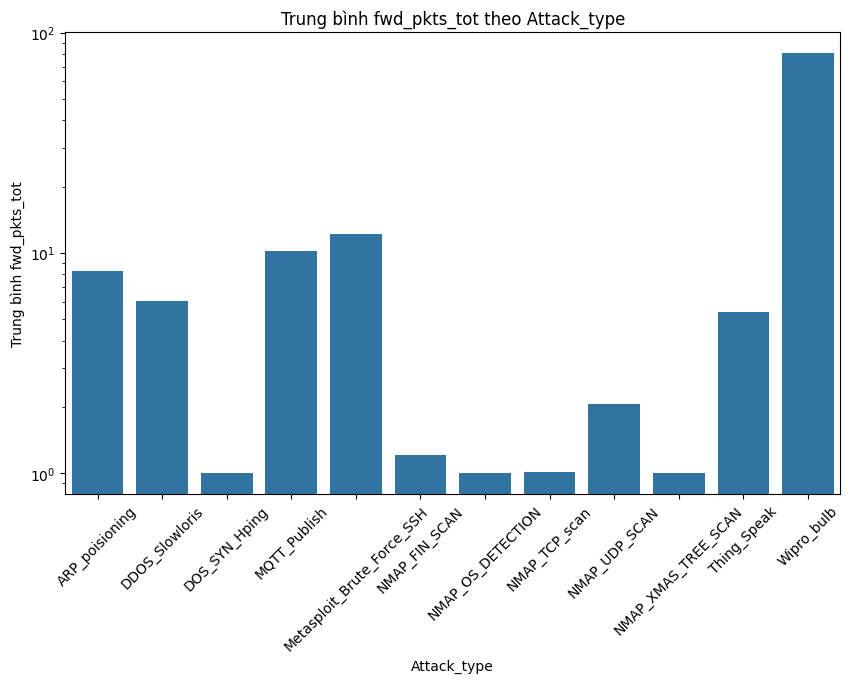

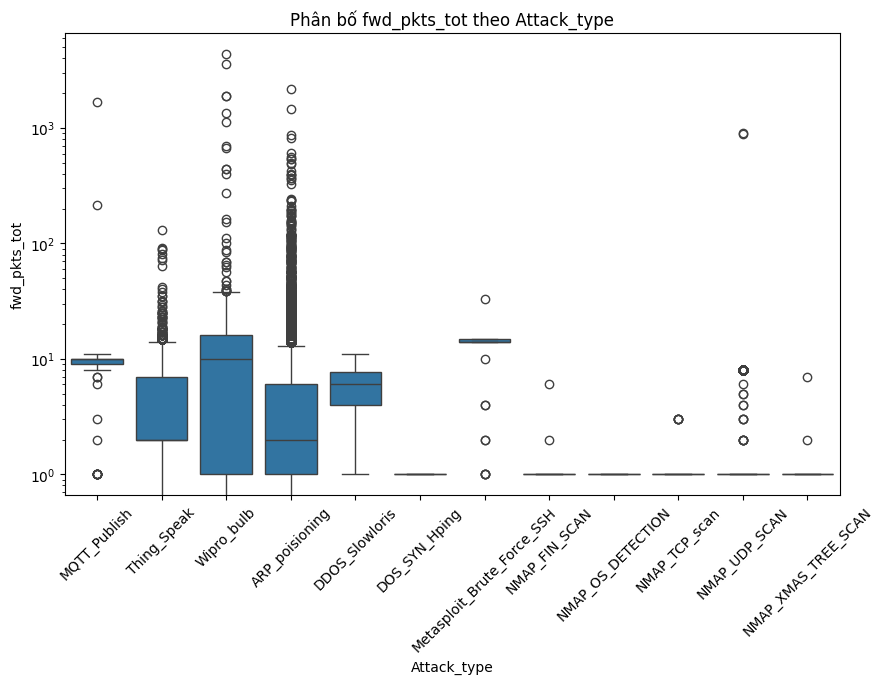

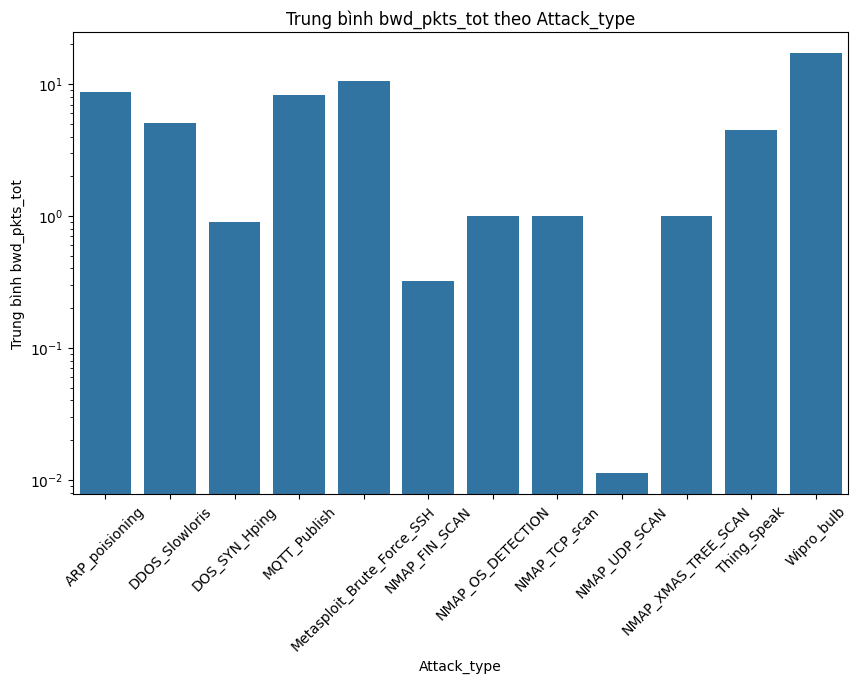

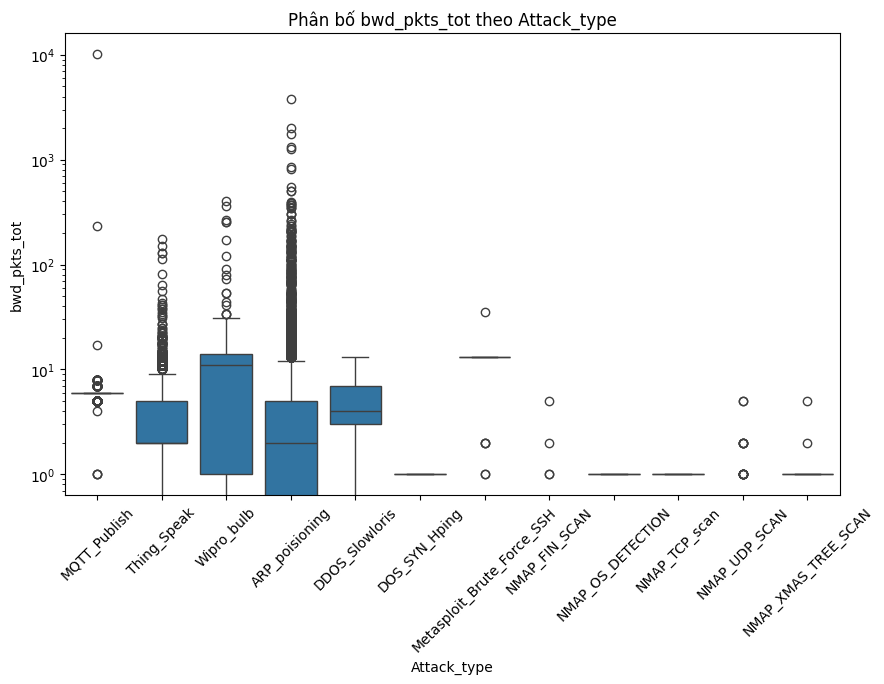

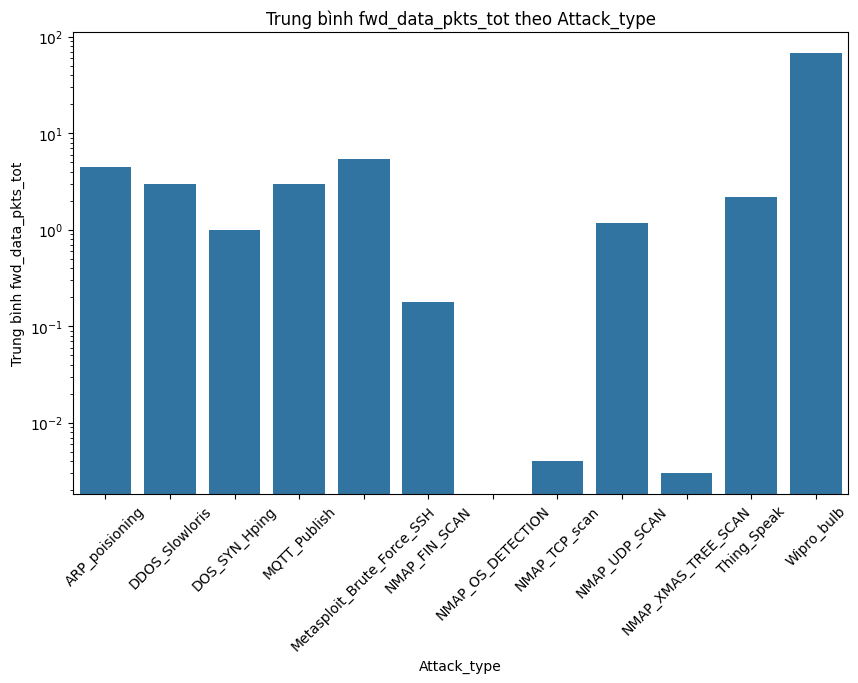

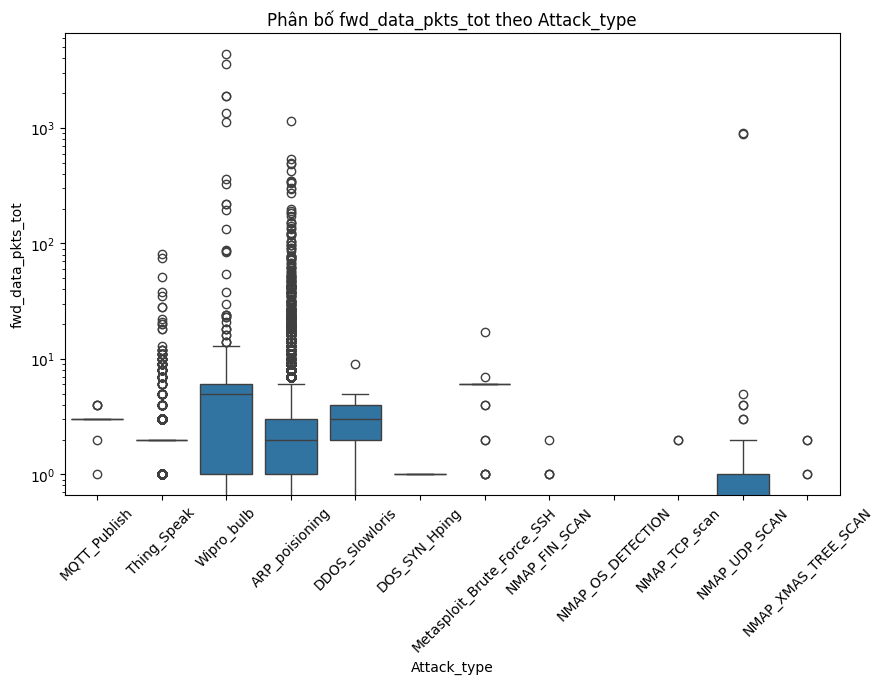

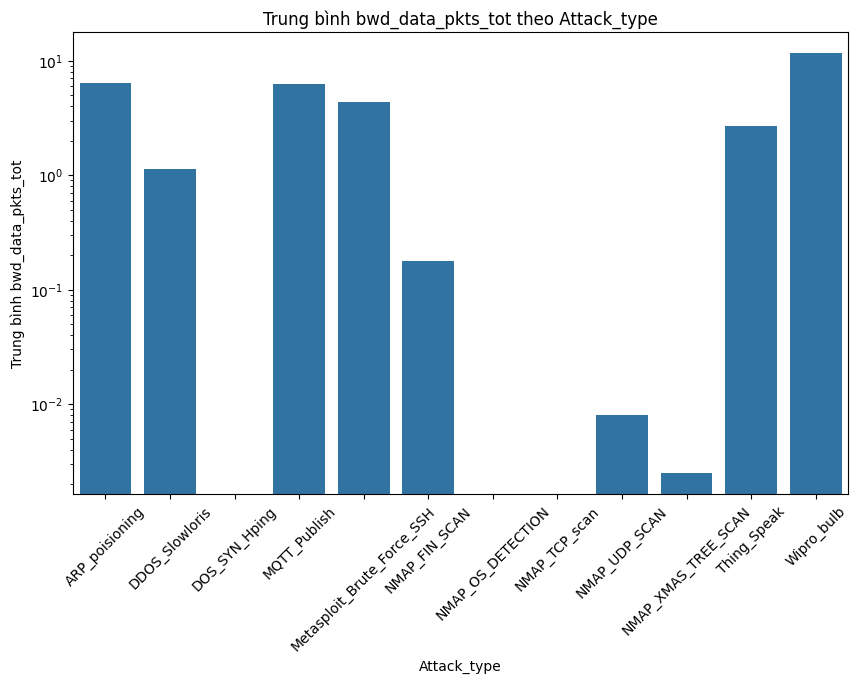

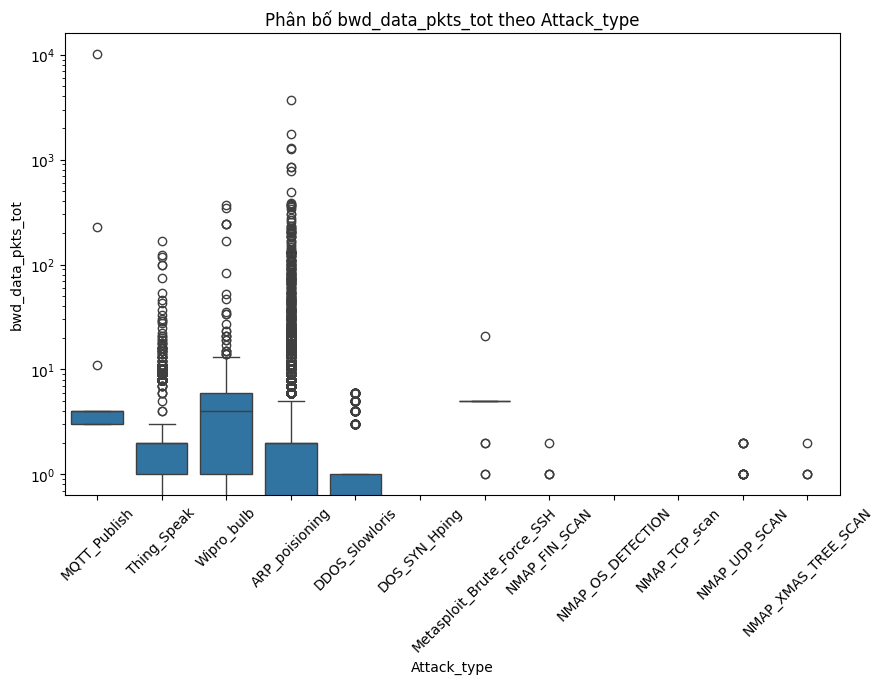

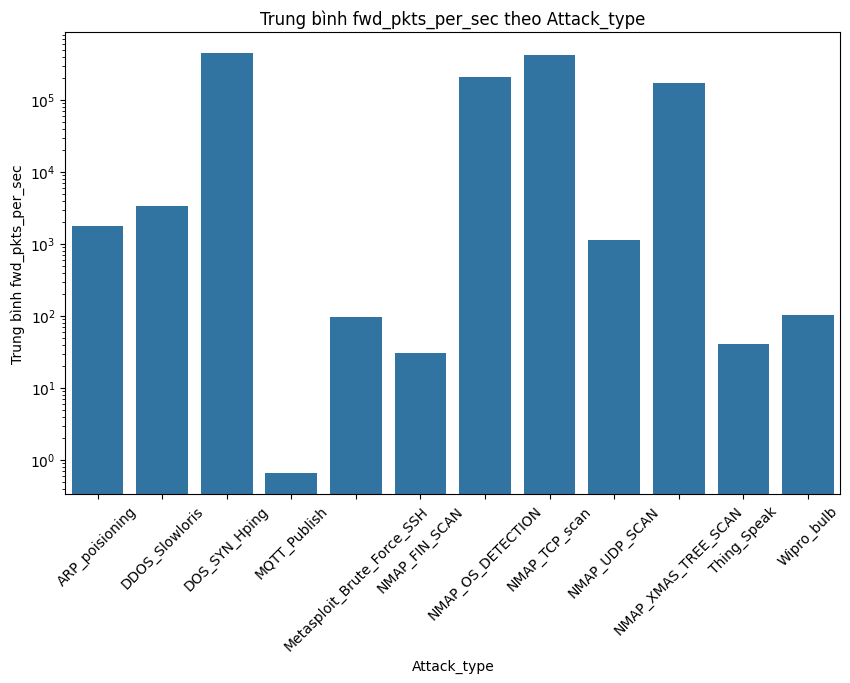

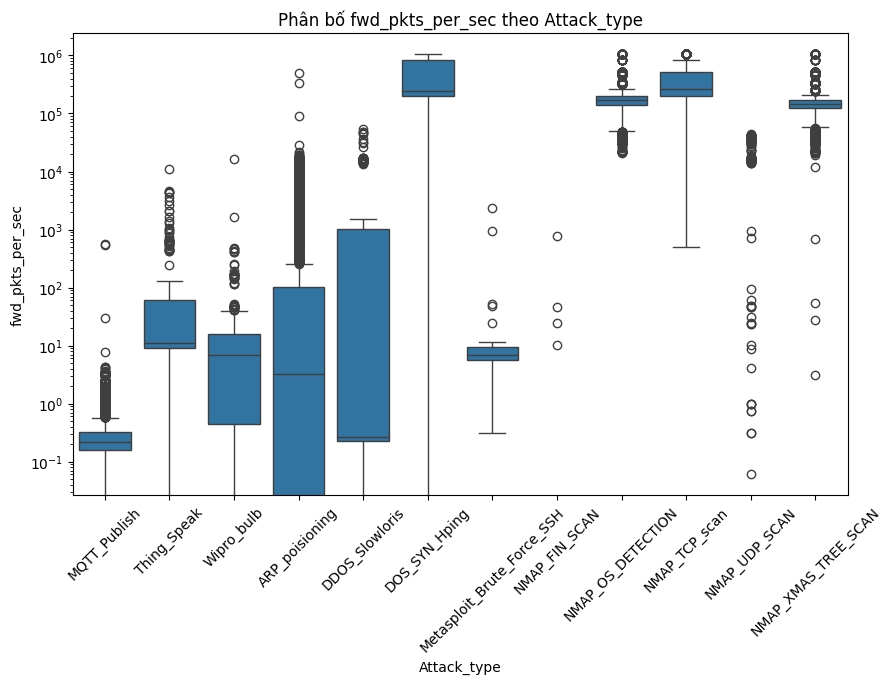

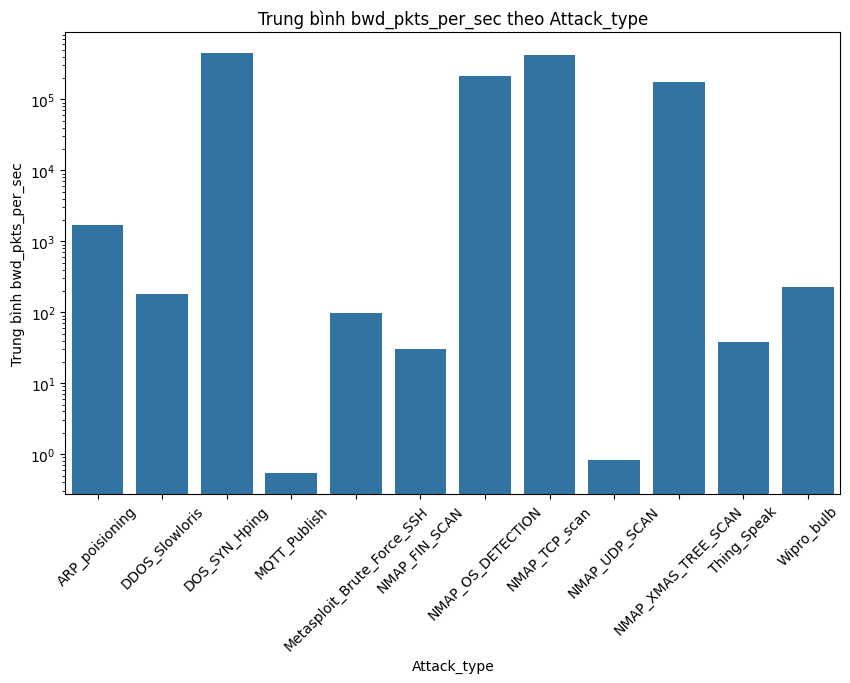

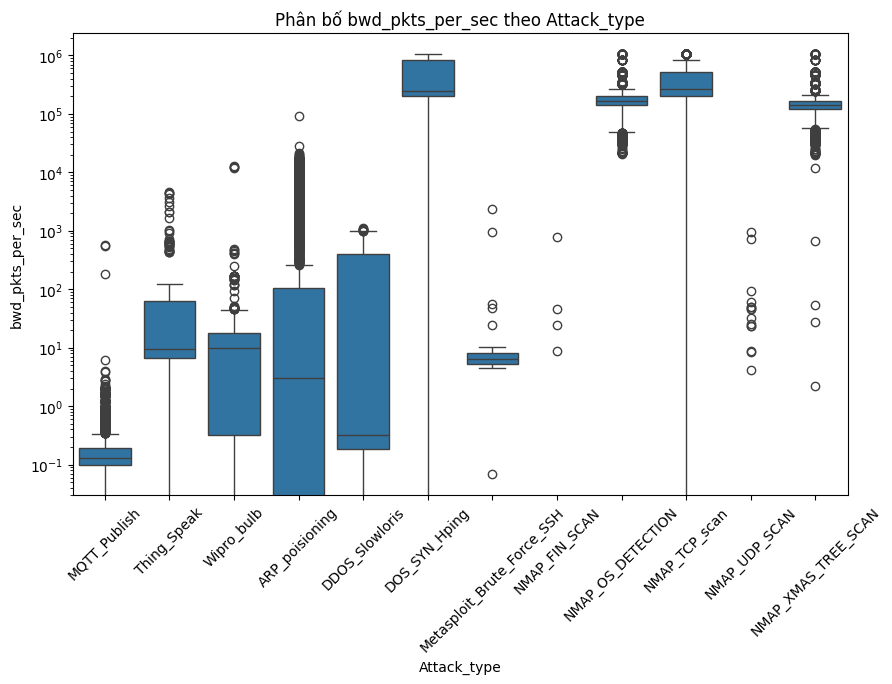

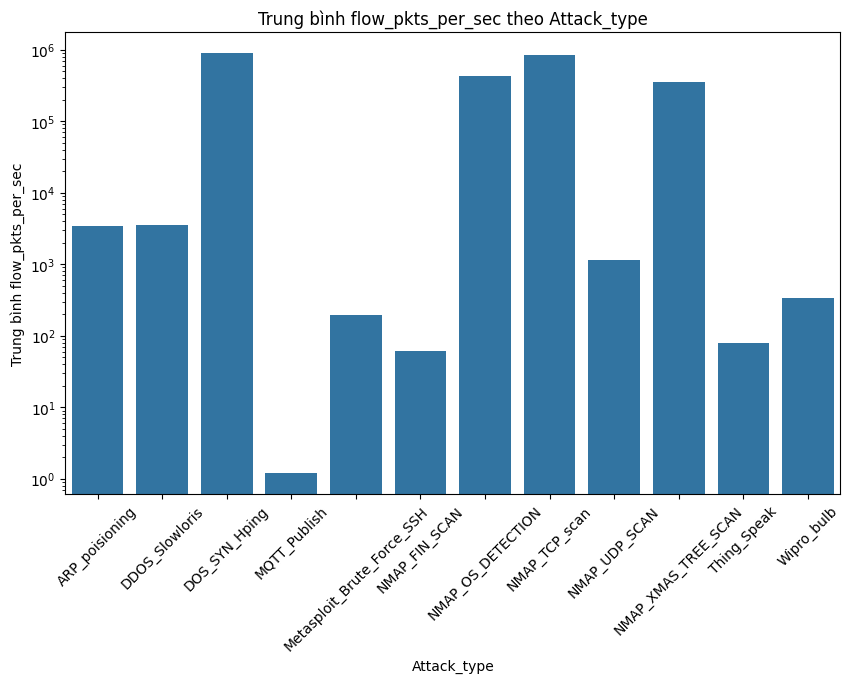

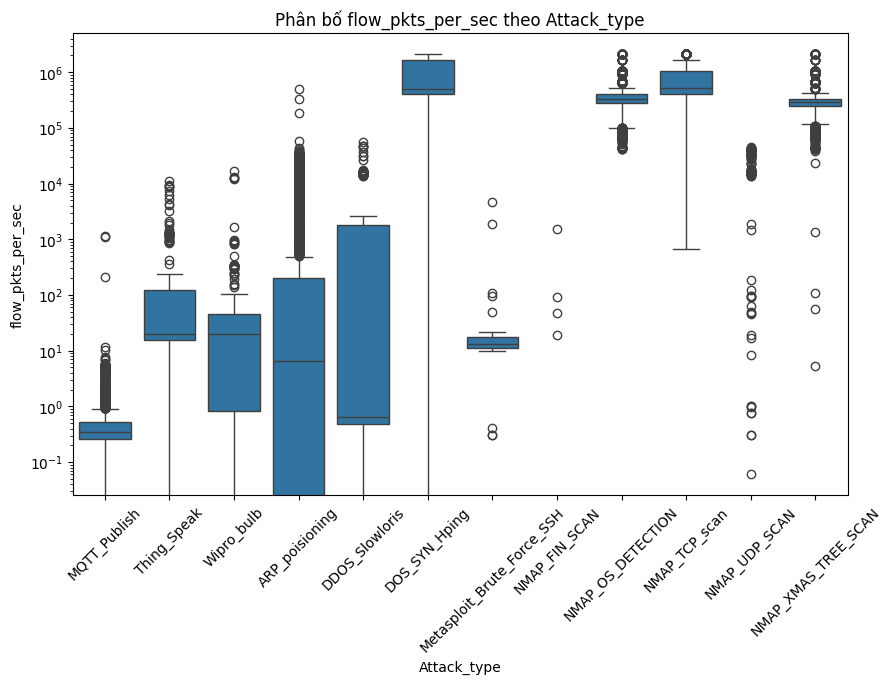

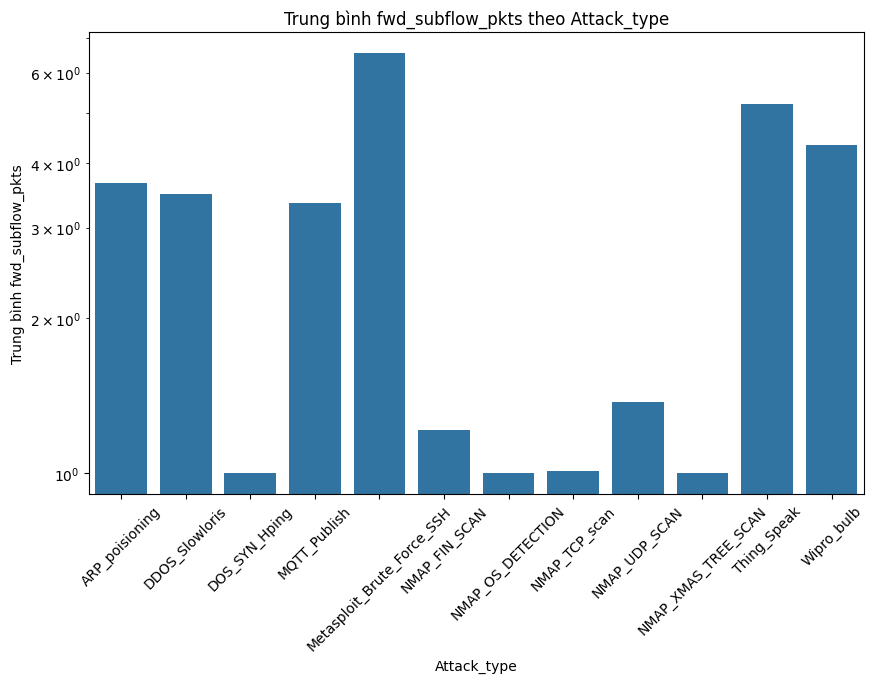

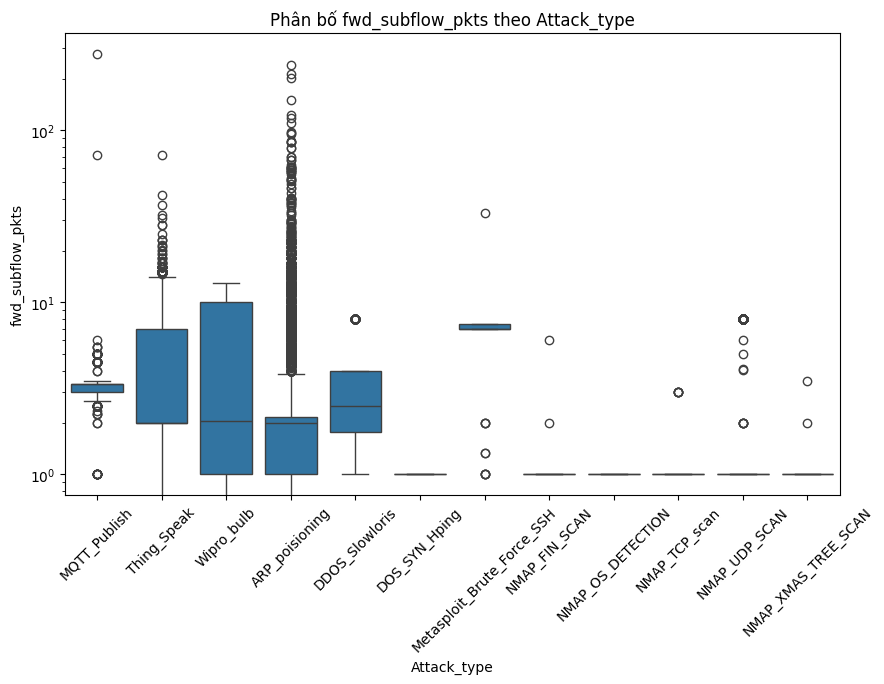

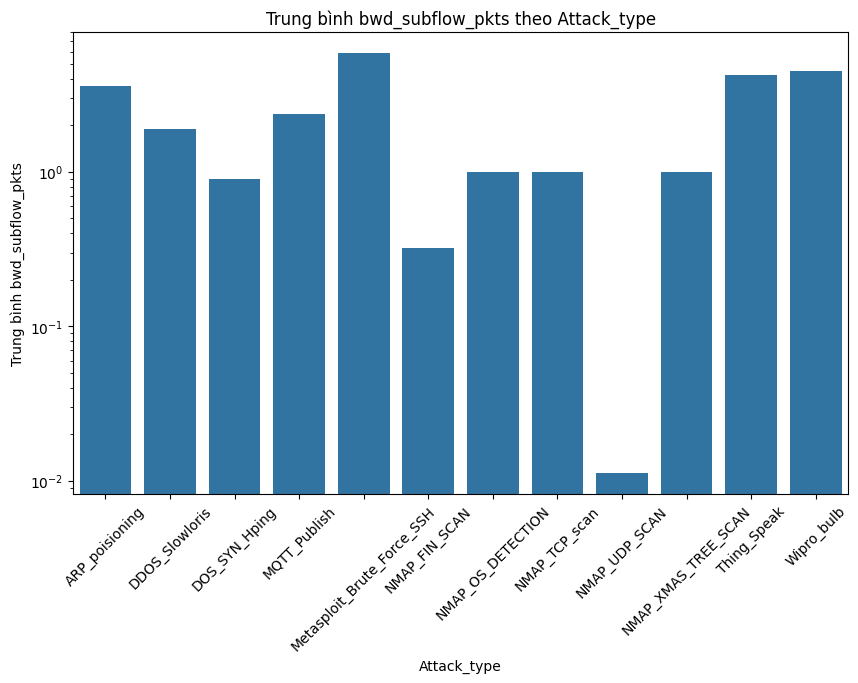

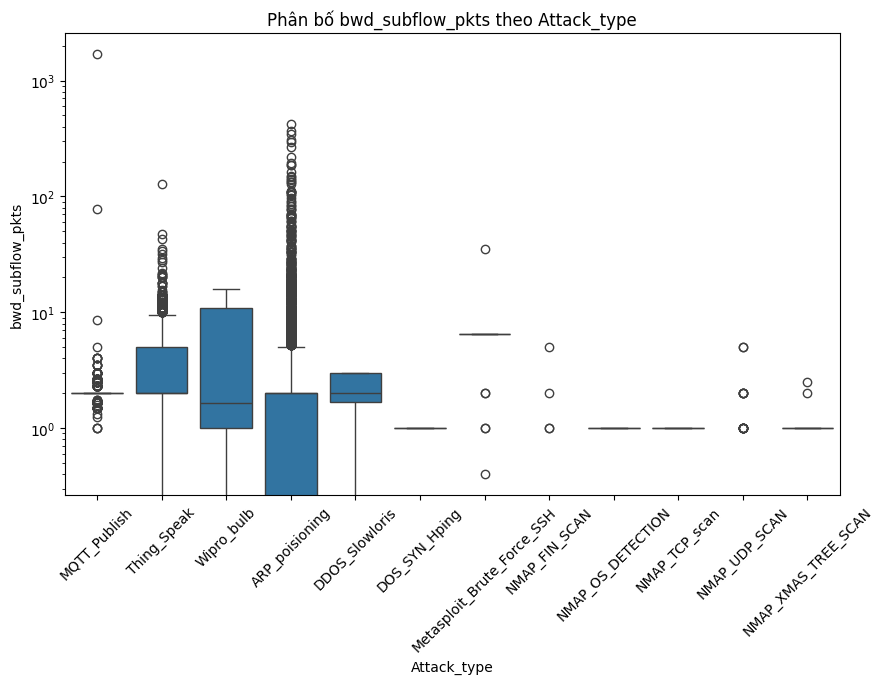

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

def group_statistics_analysis(df, features, group_by_col, output_dir='stats_output'):
    """
    Hàm thực hiện thống kê nhóm trên dataframe, phân tích các đặc trưng theo cột nhóm.
    
    Parameters:
    - df (pd.DataFrame): Dataframe chứa dữ liệu (ví dụ: RT-IoT2022).
    - features (list): Danh sách các cột đặc trưng để phân tích (ví dụ: ['fwd_pkts_tot', 'flow_duration']).
    - group_by_col (str): Tên cột để nhóm dữ liệu (ví dụ: 'Attack_type').
    - output_dir (str): Thư mục lưu kết quả (mặc định: 'stats_output').
    
    Returns:
    - None: In kết quả, vẽ biểu đồ, và lưu file CSV.
    """
    # 1. Kiểm tra dữ liệu đầu vào
    if not all(feat in df.columns for feat in features):
        raise ValueError("Một hoặc nhiều đặc trưng không tồn tại trong dataframe.")
    if group_by_col not in df.columns:
        raise ValueError(f"Cột {group_by_col} không tồn tại trong dataframe.")
    
    print("Kiểm tra giá trị khuyết:")
    print(df[features + [group_by_col]].isnull().sum())
    
    # Tạo thư mục đầu ra nếu chưa tồn tại
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # 2. Thống kê nhóm cho từng đặc trưng
    for feat in features:
        print(f"\n=== Phân tích đặc trưng: {feat} ===")
        
        # Trung bình
        group_mean = df.groupby(group_by_col)[feat].mean()
        print(f"\nTrung bình {feat} theo {group_by_col}:")
        print(group_mean)
        
        # Trung vị
        group_median = df.groupby(group_by_col)[feat].median()
        print(f"\nTrung vị {feat} theo {group_by_col}:")
        print(group_median)
        
        # Thống kê chi tiết
        group_stats = df.groupby(group_by_col)[feat].describe()
        print(f"\nThống kê chi tiết {feat} theo {group_by_col}:")
        print(group_stats)
        
        # Lưu thống kê chi tiết
        group_stats.to_csv(os.path.join(output_dir, f'{feat}_stats.csv'))
        print(f"\nĐã lưu thống kê vào {output_dir}/{feat}_stats.csv")
        
        # 3. Trực quan hóa
        # Biểu đồ cột cho trung bình
        plt.figure(figsize=(10, 6))
        sns.barplot(x=group_mean.index, y=group_mean.values)
        plt.title(f'Trung bình {feat} theo {group_by_col}')
        plt.xlabel(group_by_col)
        plt.ylabel(f'Trung bình {feat}')
        plt.xticks(rotation=45)
        plt.yscale('log')  # Dùng log-scale để xử lý giá trị lớn
        plt.savefig(os.path.join(output_dir, f'{feat}_mean_barplot.png'))
        # plt.show()
        
        # Boxplot cho phân bố
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=group_by_col, y=feat, data=df)
        plt.title(f'Phân bố {feat} theo {group_by_col}')
        plt.xlabel(group_by_col)
        plt.ylabel(feat)
        plt.xticks(rotation=45)
        plt.yscale('log')  # Dùng log-scale để dễ quan sát
        plt.savefig(os.path.join(output_dir, f'{feat}_boxplot.png'))
        # plt.show()
    
    # 4. Thống kê nhóm cho nhiều đặc trưng
    group_multi = df.groupby(group_by_col)[features].agg(['mean', 'median', 'std'])
    print("\nThống kê nhiều đặc trưng theo {}:".format(group_by_col))
    print(group_multi)
    
    # Lưu thống kê nhiều đặc trưng
    group_multi.to_csv(os.path.join(output_dir, 'multi_features_stats.csv'))
    print(f"\nĐã lưu thống kê nhiều đặc trưng vào {output_dir}/multi_features_stats.csv")
    
    # 5. Phân tích mẫu hình
    print("\n=== Phân tích mẫu hình ===")
    for feat in features:
        max_mean_group = group_mean.idxmax() if feat in group_mean else None
        min_mean_group = group_mean.idxmin() if feat in group_mean else None
        print(f"- {feat}: Nhóm {max_mean_group} có trung bình cao nhất, nhóm {min_mean_group} thấp nhất.")
        if 'fwd_pkts_tot' == feat:
            print(f"  => Mẫu hình: {feat} cao thường liên quan đến {max_mean_group} (tấn công mạnh).")
        if 'flow_duration' == feat:
            print(f"  => Mẫu hình: {feat} thấp có thể liên quan đến tấn công nhanh như DDoS.")
        if 'pkt_len_avg' == feat:
            print(f"  => Mẫu hình: {feat} cao có thể do gửi gói tin lớn trong tấn công.")

# Ví dụ sử dụng
if __name__ == "__main__":
    # Đọc dữ liệu RT-IoT2022
    try:
        data = pd.read_csv('data/RT_IOT2022')
        
        # Danh sách đặc trưng
#         features = [
#     'flow_duration',
#     'fwd_iat.min', 'fwd_iat.max', 'fwd_iat.tot', 'fwd_iat.avg', 'fwd_iat.std',
#     'bwd_iat.min', 'bwd_iat.max', 'bwd_iat.tot', 'bwd_iat.avg', 'bwd_iat.std',
#     'flow_iat.min', 'flow_iat.max', 'flow_iat.tot', 'flow_iat.avg', 'flow_iat.std',
#     'active.min', 'active.max', 'active.tot', 'active.avg', 'active.std',
#     'idle.min', 'idle.max', 'idle.tot', 'idle.avg', 'idle.std',
#     'fwd_pkts_per_sec', 'bwd_pkts_per_sec', 'flow_pkts_per_sec',
#     'payload_bytes_per_second'
# ]
        features = [
    "fwd_pkts_tot", "bwd_pkts_tot", "fwd_data_pkts_tot", "bwd_data_pkts_tot",
    "fwd_pkts_per_sec", "bwd_pkts_per_sec", "flow_pkts_per_sec",
    "fwd_subflow_pkts", "bwd_subflow_pkts"
]
        # Gọi hàm
        group_statistics_analysis(
            df=data,
            features=features,
            group_by_col='Attack_type',
            output_dir='stats_output'
        )
    except FileNotFoundError:
        print("File RT_IoT2022.csv không tìm thấy. Vui lòng kiểm tra đường dẫn.")